lets activate Autoreload in order to all changed code before any execution

In [3]:
%reload_ext autoreload
%autoreload 2

# Lets imoprt all the libraries we need

In [118]:
# ---------------------------------- Models ---------------------------------- #
from darts.models import TFTModel
import torch

# ---------------------------------- Tabular --------------------------------- #
import pandas as pd
import numpy as np

# ----------------------------------- Utils ---------------------------------- #
from darts import TimeSeries
import matplotlib.pyplot as plt

In [24]:
# check if working in colab
try:
    # In colab
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content/drive/MyDrive/projects/paris-traffic-forecast
    %pip install -q darts

except:
    # In local
    A = %pwd
    if A.split('/')[-1] == "notebooks":
        %cd ..
%pwd

'/mnt/c/Users/Mustapha/Documents/competitions/BCG_Gamma/paris-traffic-forecast'

## Needs

Prior to executing this notebook you should have your data in the data folder, please execute the bash script `data_src/get_data.sh` to download the data.

In [47]:
# !./data_src/get_data.sh

# Get data

In [148]:
data_paths = ["data/AV_Champs_Elysees.csv", "data/Convention.csv", "data/Sts_Peres.csv"]
time_col = "Date et heure de comptage"
input_cols = ["Date et heure de comptage"]
output_cols = ["Débit horaire", "Taux d'occupation"]

# print("Data will be linearly interpolated, nan values will be replaced by the weighted average of the surrounding values != np.nan")
df = pd.read_csv(data_paths[0], sep=";").sort_values(time_col)
# print("all data :")
# display(df.head(2))
print("Important data :")
display(df[input_cols+output_cols].head())

Data will be linearly interpolated, nan values will be replaced by the weighted average of the surrounding values != np.nan
Important data :


,Date et heure de comptage,Débit horaire,Taux d'occupation
4253,2020-11-01T04:00:00+01:00,34.0,0.40111
4258,2020-11-01T05:00:00+01:00,40.0,0.48389
3155,2020-11-01T06:00:00+01:00,66.0,0.75056
3535,2020-11-01T07:00:00+01:00,108.0,0.99611
4251,2020-11-01T08:00:00+01:00,126.0,1.09889


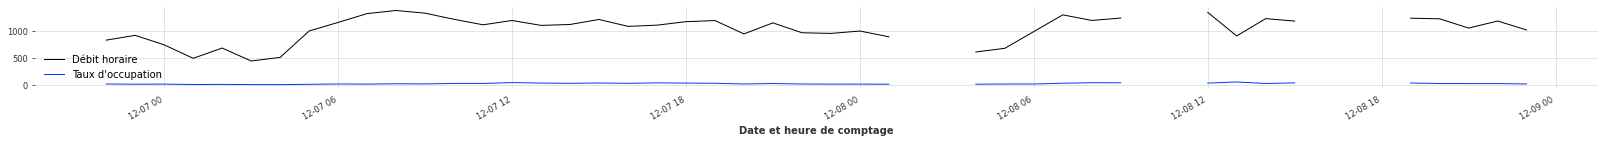

In [177]:
# ------------------------------ Other approach ------------------------------ #
# X = pd.DatetimeIndex(pd.to_datetime(df['Date et heure de comptage'], utc=True).dt.tz_localize(None))
# Y = df[output_cols]

# ---------------------------- Nouamane's approach --------------------------- #
new_df = df.copy()
new_df[time_col] = pd.to_datetime(df[time_col], utc=True).dt.tz_localize(None)
new_df[time_col] = pd.DatetimeIndex(new_df[time_col])
new_df = new_df.set_index(time_col)

ts = TimeSeries.from_dataframe(new_df, 
                          value_cols=output_cols,
                          fill_missing_dates=True,
                          freq='H')
# fig, _ = plt.subplots(figsize=(28, 4))
# ts[-900:].plot(lw=1, figure = fig)
plt.figure(figsize=(28, 1.5))
ts[-50:].plot(lw=1)

## Fill nan values

In [175]:
pd.DataFrame(ts.values()).interpolate().to_numpy()

In [153]:
df.count()

Identifiant arc              9424
Libelle                      9424
Date et heure de comptage    9424
Débit horaire                9366
Taux d'occupation            9360
Etat trafic                  9424
Identifiant noeud amont      9424
Libelle noeud amont          9424
Identifiant noeud aval       9424
Libelle noeud aval           9424
Etat arc                     9424
Date debut dispo data        9424
Date fin dispo data          9424
geo_point_2d                 9424
geo_shape                    9424
dtype: int64

In [178]:
ts[-7]

<TimeSeries (DataArray) (Date et heure de comptage: 1, component: 2, sample: 1)>
array([[[nan],
        [nan]]])
Coordinates:
  * Date et heure de comptage  (Date et heure de comptage) datetime64[ns] 202...
  * component                  (component) object 'Débit horaire' "Taux d'occ...
Dimensions without coordinates: sample

In [179]:
print("hash")

hash


In [155]:
df.tail(10)

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
2446,4264,AV_Champs_Elysees,2021-12-08T14:00:00+01:00,909.0,53.07722,Bloqué,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2357,4264,AV_Champs_Elysees,2021-12-08T15:00:00+01:00,1231.0,24.73722,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2356,4264,AV_Champs_Elysees,2021-12-08T16:00:00+01:00,1185.0,36.45889,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2445,4264,AV_Champs_Elysees,2021-12-08T17:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2444,4264,AV_Champs_Elysees,2021-12-08T19:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2355,4264,AV_Champs_Elysees,2021-12-08T20:00:00+01:00,1239.0,34.11556,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2443,4264,AV_Champs_Elysees,2021-12-08T21:00:00+01:00,1227.0,24.32667,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2354,4264,AV_Champs_Elysees,2021-12-08T22:00:00+01:00,1055.0,23.25556,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2353,4264,AV_Champs_Elysees,2021-12-08T23:00:00+01:00,1186.0,23.36223,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2442,4264,AV_Champs_Elysees,2021-12-09T00:00:00+01:00,1020.0,16.19444,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


In [154]:
new_df.tail(10)

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
Date et heure de comptage,,,,,,,,,,,,,,
2021-12-08 13:00:00,4264,AV_Champs_Elysees,909.0,53.07722,Bloqué,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-12-08 14:00:00,4264,AV_Champs_Elysees,1231.0,24.73722,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-12-08 15:00:00,4264,AV_Champs_Elysees,1185.0,36.45889,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-12-08 16:00:00,4264,AV_Champs_Elysees,1203.0,35.67778,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-12-08 18:00:00,4264,AV_Champs_Elysees,1221.0,34.89667,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-12-08 19:00:00,4264,AV_Champs_Elysees,1239.0,34.11556,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-12-08 20:00:00,4264,AV_Champs_Elysees,1227.0,24.32667,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-12-08 21:00:00,4264,AV_Champs_Elysees,1055.0,23.25556,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-12-08 22:00:00,4264,AV_Champs_Elysees,1186.0,23.36223,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


# Model testing

In [57]:
model = TFTModel()